# 1. Convert Real Images to Pixel Values

Connect to google drive, Load the images to Colab, Resize the images and Covert images into pixel values.

In [ ]:
import tensorflow as tf
import numpy as np
import os

# Step 1: Mount Google Drive (run once)
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Update this path to your Drive folder where images are stored
image_dir = '/content/drive/MyDrive/Croped_images'

# Step 3: List all image files in the directory (sorted for consistency)
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

# Step 4: Load images
image_data = []
for file in image_files:
    img_path = os.path.join(image_dir, file)

    # Load image in grayscale and resize to 28x28
    img = tf.keras.utils.load_img(img_path, color_mode='grayscale', target_size=(28, 28))

    # Convert to array and normalize pixel values
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    image_data.append(img_array)

# Step 5: Convert to NumPy array
image_data = np.array(image_data)

# Step 6: Display results
print(f"Loaded {len(image_data)} images. Shape of each: {image_data[0].shape}")
print("Pixel values (first image):")
print(np.round(image_data[0].squeeze(), 3))  # Rounded for readability

Mounted at /content/drive
Loaded 24 images. Shape of each: (28, 28, 1)
Pixel values (first image):
[[0.737 0.745 0.761 0.765 0.773 0.776 0.784 0.784 0.792 0.796 0.792 0.804
  0.796 0.804 0.812 0.796 0.8   0.812 0.812 0.808 0.808 0.808 0.808 0.808
  0.804 0.8   0.8   0.804]
 [0.737 0.749 0.753 0.769 0.776 0.773 0.776 0.792 0.78  0.796 0.804 0.816
  0.8   0.812 0.808 0.804 0.808 0.816 0.82  0.82  0.816 0.812 0.812 0.812
  0.808 0.812 0.812 0.808]
 [0.753 0.757 0.769 0.776 0.78  0.792 0.788 0.788 0.792 0.812 0.816 0.824
  0.808 0.808 0.812 0.816 0.82  0.816 0.812 0.824 0.816 0.816 0.824 0.824
  0.816 0.816 0.812 0.812]
 [0.757 0.765 0.784 0.78  0.788 0.792 0.788 0.792 0.808 0.8   0.812 0.816
  0.82  0.808 0.82  0.82  0.82  0.824 0.816 0.824 0.824 0.82  0.824 0.82
  0.82  0.824 0.824 0.82 ]
 [0.761 0.773 0.773 0.78  0.792 0.796 0.796 0.812 0.812 0.812 0.824 0.816
  0.808 0.827 0.816 0.816 0.824 0.824 0.831 0.824 0.847 0.843 0.835 0.827
  0.831 0.831 0.827 0.827]
 [0.761 0.773 0.773 0.784 0

Display the Original Images

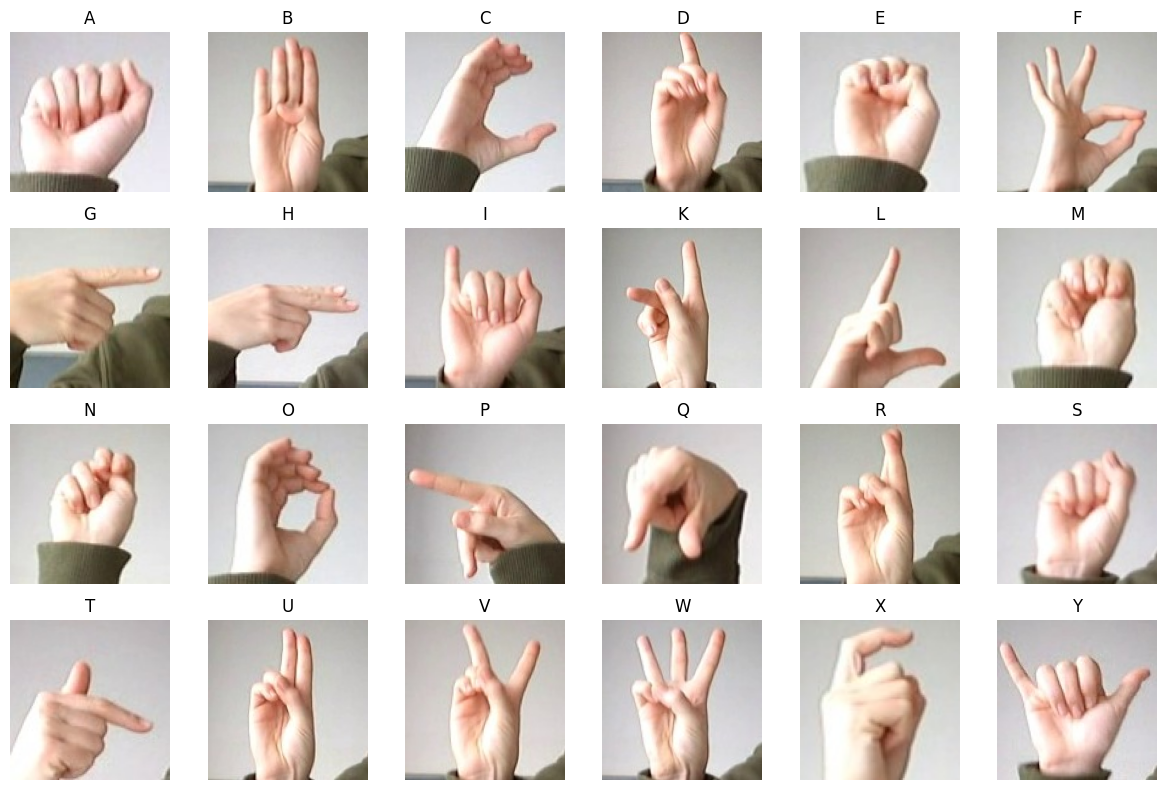

In [ ]:
# Print Original Images
import matplotlib.pyplot as plt
from PIL import Image
import os

# List of letters A–Y excluding J and Z
letters = [chr(i) for i in range(65, 91) if chr(i) not in ['J', 'Z']]  # ['A', 'B', ..., 'Y'] without 'J' and 'Z'
folder_path = "/content/drive/MyDrive/Croped_images"

# Plot
plt.figure(figsize=(12, 8))
for i, letter in enumerate(letters):
    file_path = os.path.join(folder_path, f"{letter}0_Crop.jpg")

    if os.path.exists(file_path):
        img = Image.open(file_path)
        plt.subplot(4, 6, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(letter)
    else:
        print(f"File not found: {file_path}")

plt.tight_layout()
plt.show()

Display the grayscale images

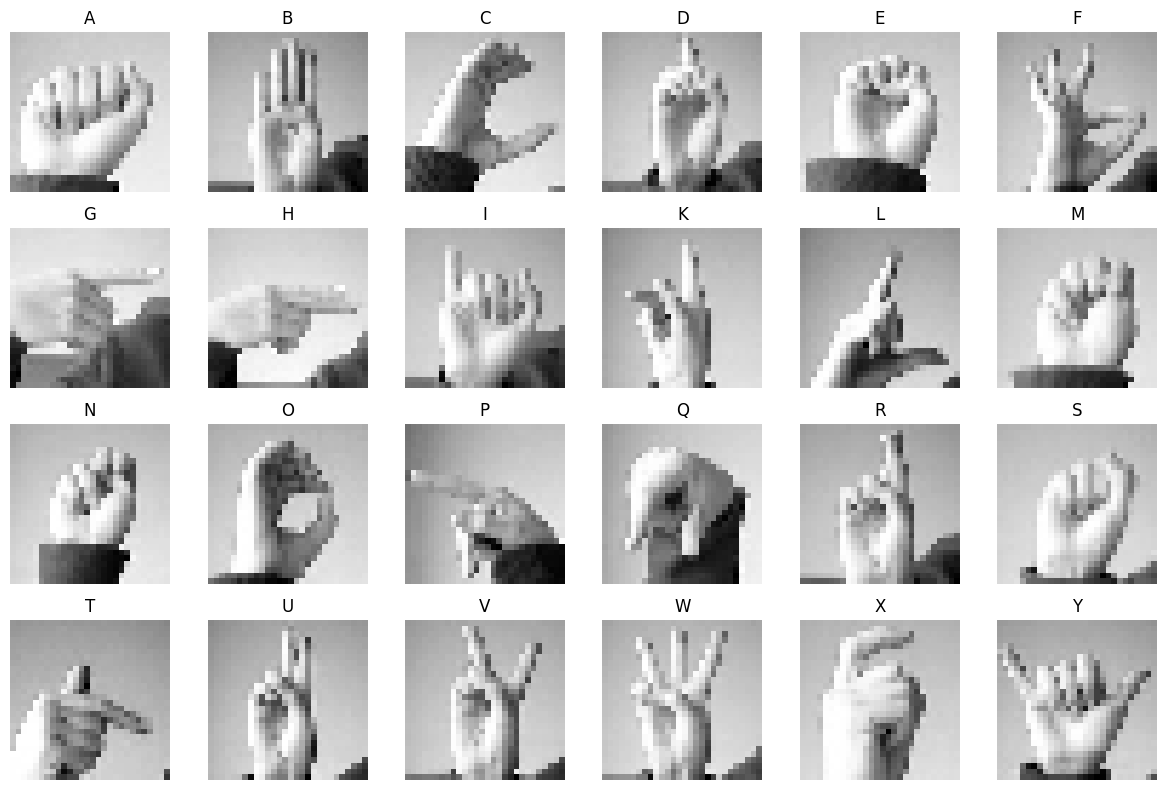

In [ ]:
#Print the grayscaleimage
import matplotlib.pyplot as plt
import math


# Define the 24 letters (A-Z excluding J and Z)
letters = [chr(i) for i in range(65, 91) if chr(i) not in ['J', 'Z']]

# Number of images to show
num_images = len(image_data)

# Grid size (e.g., 4 rows x 6 columns for 24 images)
rows = 4
cols = 6

plt.figure(figsize=(12, 8))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image_data[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(letters[i], fontsize=12)

plt.tight_layout()
plt.show()

# 2. Sign Language Recognition

Connect to Kaggle to import Data

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
import kagglehub
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

Import training and test data from Kaggle

In [ ]:
#Import data derectly from kaggle
train_data = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_data = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")


In [ ]:
#Use the following code to read data from google.colab import files
#uploaded = files.upload()


In [ ]:
#train_data = pd.read_csv("sign_mnist_train.csv")
#test_data = pd.read_csv("sign_mnist_test.csv")

In [ ]:
# First 10 trainging data
train_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [ ]:
print(9 in train_data['label'].values)   # Will return True if 9 exists
print(25 in train_data['label'].values)  # Will return True if 25 exists

False
False


Data Visualization and Preprocessing

Bar plot showing how many examples there are for each class label in the train_data

/tmp/ipython-input-2371040010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette="Set2")


<Axes: xlabel='label', ylabel='count'>

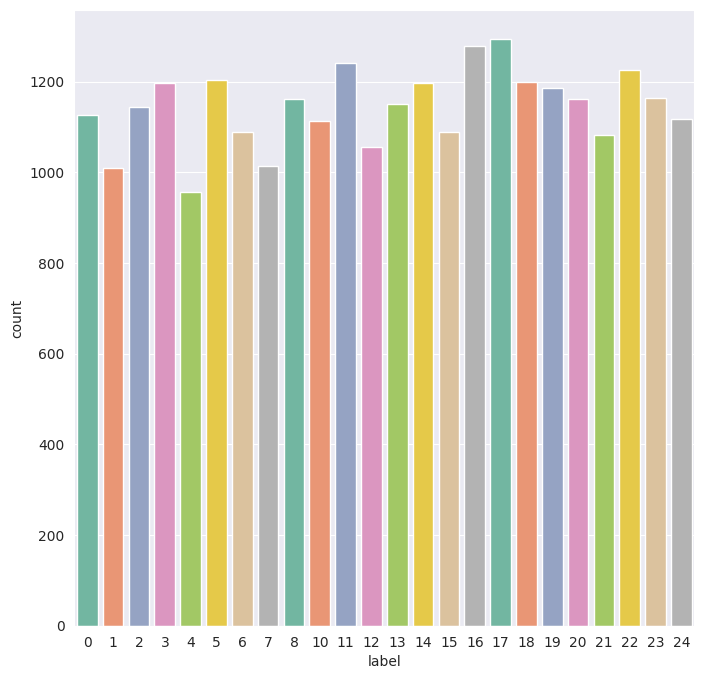

In [ ]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.countplot(x='label', data=train_data, palette="Set2")
#sns.countplot(x='letter', data=train_data, palette="Set2")

Sperate X and Y from train and test data sets

In [ ]:
#train test split
X_train = train_data.drop(columns=['label']).values
X_test = test_data.drop(columns=['label']).values
y_train = train_data['label'].values
y_test = test_data['label'].values
y_train[0:15]

array([ 3,  6,  2,  2, 13, 16,  8, 22,  3,  3, 18, 10, 16, 22, 20])

Convert response Y into one-hot vector

In [ ]:
#Convert response into one-hot vector
all_classes = np.arange(26)

label_binarizer = LabelBinarizer()
label_binarizer.fit(all_classes)
y_train_encoded = label_binarizer.transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

print(y_train_encoded.shape)
y_train_encoded[0:15]

(27455, 26)


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Normalization of the image pixel values
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#reshapes flattened image data into its original 2D image shape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

Display first few sample images

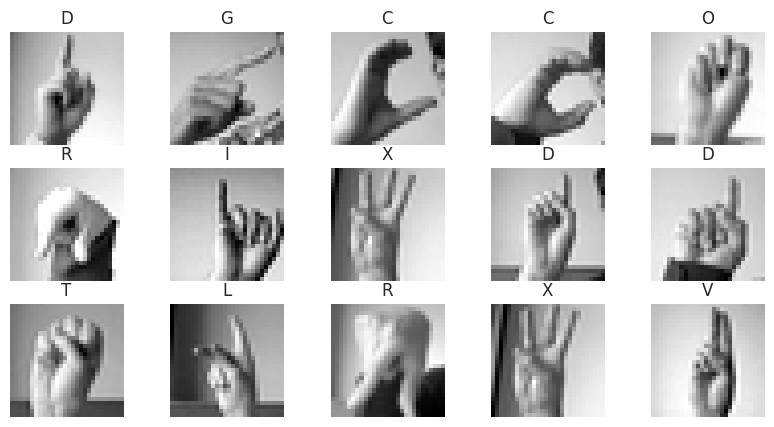

In [ ]:
#Sample images
import matplotlib.pyplot as plt

# Plot 10 images in a 2x5 grid
f, ax = plt.subplots(3, 5, figsize=(10, 5))

# Inverse-transform one-hot encoded labels back to original (e.g., 0–25)
# Use y_train directly if it's already integers
y_labels = y_train  # No need to inverse_transform

for i in range(3):
    for j in range(5):
        index = i * 5 + j
        ax[i][j].imshow(X_train[index].reshape(28, 28), cmap='gray')
        ax[i][j].axis('off')

        # Convert label integer to letter (e.g., 0 → 'A', 3 → 'D')
        #label_char = chr(y_labels[index] + 65)
        #ax[i][j].set_title(label_char)

        labels_map = [c for c in "ABCDEFGHIKLMNOPQRSTUVWXY"]

        label_char = labels_map[y_labels[index]]
        ax[i][j].set_title(label_char)



# Convolution Neural Network (CNN) architecture

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 26 , activation = 'softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model parameters

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,075 (1.01 MB)

 Trainable params: 264,775 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

Fit the CNN model

In [ ]:
import random
random.seed(6340)
history = model.fit(X_train , y_train_encoded , epochs = 6 , batch_size = 32 , validation_split = 0.2)

Epoch 1/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.7055 - loss: 1.0115 - val_accuracy: 0.9903 - val_loss: 0.0707
Epoch 2/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 79s 116ms/step - accuracy: 0.9933 - loss: 0.0235 - val_accuracy: 0.9778 - val_loss: 0.0617
Epoch 3/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9944 - val_loss: 0.0215
Epoch 4/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9923 - loss: 0.0218 - val_accuracy: 0.9703 - val_loss: 0.0907
Epoch 5/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.9983 - loss: 0.0078 - val_accuracy: 0.9903 - val_loss: 0.0267
Epoch 6/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9321 - val_loss: 0.2142


Model evaluation

In [ ]:
model.evaluate(X_test , y_test_encoded)

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8481 - loss: 0.7245


[0.6931744813919067, 0.8517847061157227]

CNN model has an accuracy of 0.952 (This can depend on the seed)

Disply predicted images

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
tru = y_test_encoded.argmax(axis=1)
pred[0:15], tru[0:15]


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


(array([ 6,  5, 10,  0,  3, 21, 17, 14, 17,  7,  8,  8, 21, 12,  7]),
 array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7]))

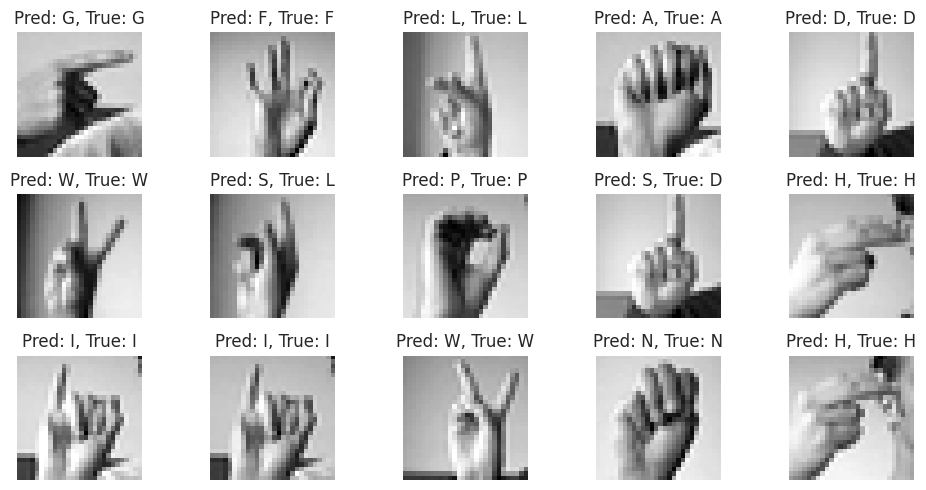

In [ ]:
import matplotlib.pyplot as plt

# Function to convert class index to letter
# Define allowed letters (A–Y, without J and Z)
letters = [c for c in "ABCDEFGHIKLMNOPQRSTUVWXY"]

# Function to map index → letter
to_letter = lambda x: letters[x]

# Plot 10 images with predicted and true labels as letters
f, ax = plt.subplots(3, 5, figsize=(10, 5))
for i in range(3):
    for j in range(5):
        index = i * 5 + j
        ax[i][j].imshow(X_test[index].reshape(28, 28), cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(f"Pred: {to_letter(pred[index])}, True: {to_letter(tru[index])}")

plt.tight_layout()
plt.show()

# Model with dropouts

CNN model architecture inlcuding dropouts

In [ ]:
## Add dropout to regularize
import random
np.random.seed(6340)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(26, activation='softmax')
])


Model parameters

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,618 (400.85 KB)

 Trainable params: 102,618 (400.85 KB)

 Non-trainable params: 0 (0.00 B)

Fit the CNN mdoel with dropouts

In [ ]:
np.random.seed(6340)
history = model.fit(X_train , y_train_encoded , epochs = 6 , batch_size = 64 , validation_split = 0.2)

Epoch 1/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.0662 - loss: 3.1308 - val_accuracy: 0.4904 - val_loss: 1.8511
Epoch 2/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.4257 - loss: 1.7352 - val_accuracy: 0.8135 - val_loss: 0.6735
Epoch 3/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.6892 - loss: 0.9154 - val_accuracy: 0.9231 - val_loss: 0.3380
Epoch 4/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.7856 - loss: 0.6105 - val_accuracy: 0.9590 - val_loss: 0.1900
Epoch 5/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8542 - loss: 0.4384 - val_accuracy: 0.9829 - val_loss: 0.1135
Epoch 6/6
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.8892 - loss: 0.3304 - val_accuracy: 0.9905 - val_loss: 0.0688


Model evaluation

In [ ]:
model.evaluate(X_test , y_test_encoded)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9132 - loss: 0.2649


[0.2702917456626892, 0.9093697667121887]

Model acuracy is 0.901 (This can depend on seed)

Disply predicted images

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
tru = y_test_encoded.argmax(axis=1)
pred[0:15], tru[0:15]

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


(array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7]),
 array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7]))

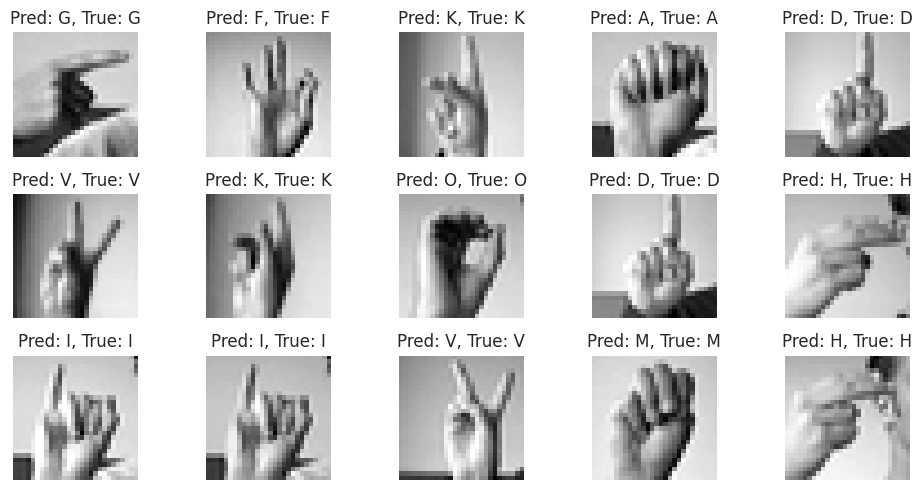

In [ ]:
import matplotlib.pyplot as plt

# Function to convert class index to letter
to_letter = lambda x: chr(x + 65)

# Plot 10 images with predicted and true labels as letters
f, ax = plt.subplots(3, 5, figsize=(10, 5))
for i in range(3):
    for j in range(5):
        index = i * 5 + j
        ax[i][j].imshow(X_test[index].reshape(28, 28), cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(f"Pred: {to_letter(pred[index])}, True: {to_letter(tru[index])}")

plt.tight_layout()
plt.show()